In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

import matplotlib.pyplot as plt

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec

In [10]:
def simple_curve(theta,a,b,c):
    dist=np.abs(np.sin(theta)*np.tan(theta)*a**2+b**2*np.cos(theta))
    beta=np.sqrt(b**2+a**2*np.tan(theta)**2)

    return(np.pi*c*dist/beta)

def SSE(x,y):
    return(np.sum(np.square(x-y)))

def minwrapper(x,mag,theta,a,b,c):
    deltaV=x[0]
    thetainit=x[1]

    sim=deltaV-2.5*np.log10(simple_curve(theta-thetainit,a,b,c))

    return(SSE(sim,mag))

def gridwrapper(p,mag,time,a,b,c):   
    theta=2*np.pi*((time*86400/p)%p)
    
    opt=minimize(minwrapper,[10,np.pi/2],args=(belmag,theta,a,b,c),bounds=[(10,40),(-np.pi/2,np.pi/2)])
    return(opt.fun)

In [11]:
plotA=np.genfromtxt('..\Lightcurves\Photometry\plotA.csv',comments='#', delimiter=',' )
plotB=np.genfromtxt('..\Lightcurves\Photometry\plotB.csv',comments='#', delimiter=',' )
plotC=np.genfromtxt('..\Lightcurves\Photometry\plotC.csv',comments='#', delimiter=',' )
plotD=np.genfromtxt('..\Lightcurves\Photometry\plotD.csv',comments='#', delimiter=',' )
plotE=np.genfromtxt('..\Lightcurves\Photometry\plotE.csv',comments='#', delimiter=',' )
plotF=np.genfromtxt('..\Lightcurves\Photometry\plotF.csv',comments='#', delimiter=',' )
plotG=np.genfromtxt('..\Lightcurves\Photometry\plotG.csv',comments='#', delimiter=',' )
plotH=np.genfromtxt('..\Lightcurves\Photometry\plotH.csv',comments='#', delimiter=',' )
plotI=np.genfromtxt('..\Lightcurves\Photometry\plotI.csv',comments='#', delimiter=',' )

belton=pd.read_csv("..\Lightcurves\BeltonLightcurves.csv").to_numpy()[:,1:3]

In [23]:
a,b,c=19,115,111

beltime=belton[:,0]
belmag=belton[:,1]

periodlist=np.linspace(7,9,100)
test=[]
for p in periodlist:
    period=p*3600
    
    test.append(gridwrapper(period,belmag,beltime,a,b,c))

print(np.min(test))

optp=periodlist[test==np.min(test)][0]
print(optp)

period=optp*3600
theta=2*np.pi*((beltime*86400/period)%period)

opt=minimize(minwrapper,[10,np.pi/2],args=(belmag,theta,a,b,c),bounds=[(10,40),(-np.pi/2,np.pi/2)])

times=np.linspace(np.min(beltime),np.max(beltime),10000)
theta=2*np.pi*((times*86400/period)%period)
print(opt)

curve=opt.x[0]-2.5*np.log10(simple_curve(theta-opt.x[1],a,b,c))

162.73092351143418
7.363636363636363
      fun: 162.73092351143418
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 5.68434192e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([33.72726847, -1.35377532])


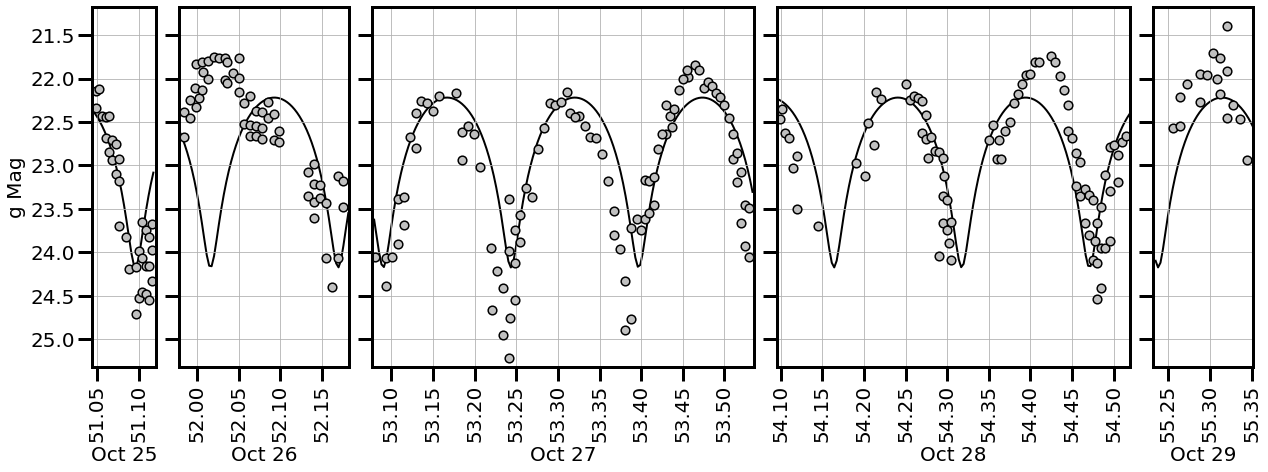

In [24]:
import matplotlib.ticker as ticker

figx,figy=16,5
fig = plt.figure(figsize=(figx,figy))
ymin,ymax=np.min(belton[:,1])-0.1,np.max(belton[:,1])+0.1

axspace=0.02
tickspace=0.05

totalwidth=5*axspace+plotA[-1,0]-plotA[0,0]+plotB[-1,0]-plotB[0,0]+plotC[-1,0]-plotC[0,0]+\
            plotD[-1,0]-plotD[0,0]+plotE[-1,0]-plotE[0,0]#+plotF[-1,0]-plotF[0,0]

corner=0

axes=[]

xmin,xmax=plotA[0,0], plotA[-1,0]
dx = (xmax-xmin)/totalwidth
axes.append(fig.add_axes([corner,0,dx,1])) 
axes[0].set_xlim([plotA[0,0],plotA[-1,0]])
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
axes[0].set_xlabel('Oct 25')
axes[0].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[0].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[0].set_ylabel('g Mag')
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotB[0,0], plotB[-1,0]
dx = (xmax-xmin)/totalwidth
axes.append(fig.add_axes([corner,0,dx,1]))
axes[1].set_xlim([plotB[0,0],plotB[-1,0]])
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
axes[1].set_xlabel('Oct 26')
axes[1].set_yticklabels([])
axes[1].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[1].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotC[0,0], plotC[-1,0]
dx = (xmax-xmin)/totalwidth
axes.append(fig.add_axes([corner,0,dx,1])) 
axes[2].set_xlim([plotC[0,0],plotC[-1,0]])
axes[2].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
axes[2].set_xlabel('Oct 27')
axes[2].set_yticklabels([])
axes[2].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[2].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotD[0,0], plotD[-1,0]
dx = (xmax-xmin)/totalwidth
axes.append(fig.add_axes([corner,0,dx,1]))
axes[3].set_xlim([plotD[0,0],plotD[-1,0]])
axes[3].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
axes[3].set_xlabel('Oct 28')
axes[3].set_yticklabels([])
axes[3].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[3].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotE[0,0], plotE[-1,0]
dx = (xmax-xmin)/totalwidth
axes.append(fig.add_axes([corner,0,dx,1]))
axes[4].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[4].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[4].set_xlabel('Oct 29')
axes[4].set_yticklabels([])
axes[4].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
axes[4].set_xlim([plotE[0,0],plotE[-1,0]])
plt.xticks(rotation=90)
corner+=dx+axspace

# xmin,xmax=plotF[0,0], plotF[-1,0]
# dx = (xmax-xmin)/totalwidth
# axes.append(fig.add_axes([corner,0,dx,1])) 
# axes[5].set_xlim([plotF[0,0],plotF[-1,0]])
# axes[5].xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
# axes[5].set_xlabel('Oct 30')
# axes[5].set_yticklabels([])
# axes[5].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
#               belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
#               s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
# axes[5].plot(times[np.where((times<xmax)&(times>xmin))],
#              curve[np.where((times<xmax)&(times>xmin))],
#              color='k',zorder=1,lw=2)
# corner+=dx+axspace

for ax in axes:
    ax.grid()
    ax.set_ylim([ymax,ymin])
    
plt.savefig('simple_lightcurve.pdf',
           bbox_inches='tight',dpi=300)

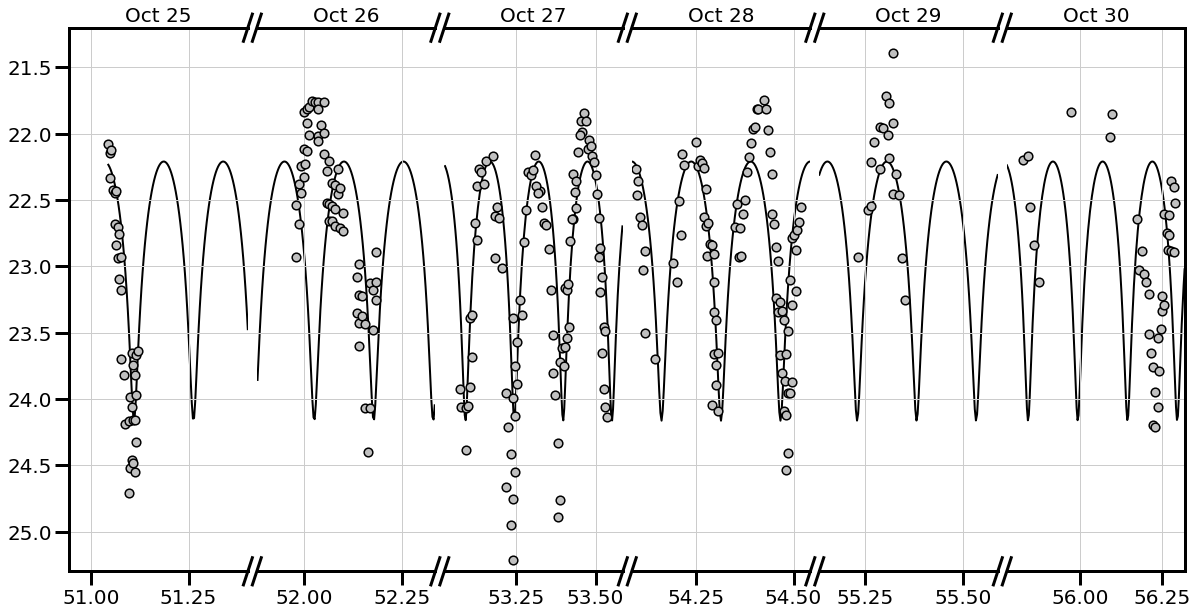

In [167]:
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(20,10),sharey=True)
axes = axes.reshape(-1)
#fig.set_facecolor('w')

d = .025
c=100

mcolor = COLOR

ender=6
for j in range(0,ender):
    axes[j].set_ylim([25.3,21.2])
    #axes[j].grid(True,alpha=.6)


for j in range(0,ender):
    ## Middle subpanels
    if j!=0 and j!=6 and j!=5 and j!=ender-1 and j<ender:
        axes[j].spines['right'].set_visible(False)
        axes[j].spines['left'].set_visible(False)
        #axes[j].set_yticks([])
        
        kwargs = dict(transform=axes[j].transAxes, color=COLOR,lw=3, clip_on=False)
        axes[j].plot((1-d,1+d), (-d,+d), **kwargs)
        axes[j].plot((1-d,1+d),(1-d,1+d), **kwargs)
        kwargs.update(transform=axes[j].transAxes)  # switch to the bottom axeses
        axes[j].plot((-d,+d), (1-d,1+d), **kwargs)
        axes[j].plot((-d,+d), (-d,+d), **kwargs)
        
    ## First subpanel per row
    elif j == 0 or j == 6:
        axes[j].spines['right'].set_visible(False)
        #axes[j].set_yticks([])
        
        kwargs = dict(transform=axes[j].transAxes, color=COLOR,lw=3, clip_on=False)
        axes[j].plot((1-d,1+d), (-d,+d), **kwargs)
        axes[j].plot((1-d,1+d),(1-d,1+d), **kwargs)
        
    ## Last subpanel per row
    elif j == 5 or j == ender-1:
        axes[j].spines['left'].set_visible(False)
        #axes[j].set_yticks([])
        
        kwargs.update(transform=axes[j].transAxes)  # switch to the bottom axeses
        axes[j].plot((-d,+d), (1-d,1+d), **kwargs)
        axes[j].plot((-d,+d), (-d,+d), **kwargs)
        

plt.subplots_adjust(wspace=0.05, hspace=0.3)

#October 25
xmin,xmax=plotA[0,0]-0.1,plotA[0,0]-0.1+plotC[-1,0]-plotC[0,0]
axes[0].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
                belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
                s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[0].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[0].set_xlim([xmin,xmax])


#October 26
xmin,xmax=plotB[0,0]-0.1,plotB[0,0]-0.1+plotC[-1,0]-plotC[0,0]
axes[1].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[1].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[1].set_xlim([xmin,xmax])

#October 27
xmin,xmax=plotC[0,0]-.05,plotC[-1,0]+.05
axes[2].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[2].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[2].set_xlim([xmin,xmax])



#October 28
xmin,xmax=plotD[0,0]-0.01,plotD[0,0]-0.01+plotC[-1,0]-plotC[0,0]
axes[3].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[3].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[3].set_xlim([xmin,xmax])

#October 29
xmin,xmax=plotE[0,0]-0.1,plotE[0,0]-0.1+plotC[-1,0]-plotC[0,0]
axes[4].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[4].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[4].set_xlim([xmin,xmax])

#October 30
xmin,xmax=plotF[0,0]-0.05,0.05+plotF[0,0]-0.01+plotC[-1,0]-plotC[0,0]
axes[5].scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
axes[5].plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='k',zorder=1,lw=2)
axes[5].set_xlim([xmin,xmax])


axes[0].set_title('Oct 25',fontsize=20)
axes[1].set_title('Oct 26',fontsize=20)
axes[2].set_title('Oct 27',fontsize=20)
axes[3].set_title('Oct 28',fontsize=20)
axes[4].set_title('Oct 29',fontsize=20)
axes[5].set_title('Oct 30',fontsize=20)

for j in range(len(axes)):
    axes[j].grid(linewidth=1,color=[0.8,0.8,0.8],alpha=1,zorder=1)
    if j != 0:
        axes[j].tick_params(axis='y', which='both', right=False,width=1,color=[0.8,0.8,0.8])
    
plt.savefig('simple_lightcurve_v1.pdf',
            bbox_inches='tight', dpi=300)